In [5]:
df <- read.csv("../donnees-synop-essentielles-omm.csv", sep = ";", header = TRUE)

# Partie 4

## Etude de correl
Matrice de correlation pour mettre en lumière les trcs à tester

,Pression.au.niveau.mer,Direction.du.vent.moyen.10.mn,Vitesse.du.vent.moyen.10.mn,Température,Humidité,Visibilité.horizontale,Pression.station,Rafale.sur.les.10.dernières.minutes,Altitude
Pression.au.niveau.mer,1.00000000,-0.025585859,-0.313257641,0.01953520,0.014459888,-0.048212038,0.40640110,-0.346450687,0.11865389
Direction.du.vent.moyen.10.mn,-0.02558586,1.000000000,0.142047353,-0.14856390,-0.007032214,0.034047766,-0.06740729,0.108588208,0.05660445
Vitesse.du.vent.moyen.10.mn,-0.31325764,0.142047353,1.000000000,-0.09042067,-0.168358484,0.007961878,0.02412200,0.974623373,-0.15142049
Température,0.01953520,-0.148563899,-0.090420673,1.00000000,-0.289619114,0.260485813,0.23883661,-0.055397773,-0.22659528
Humidité,0.01445989,-0.007032214,-0.168358484,-0.28961911,1.000000000,-0.362087476,0.07546879,-0.220767065,-0.08151427
Visibilité.horizontale,-0.04821204,0.034047766,0.007961878,0.26048581,-0.362087476,1.000000000,0.08675490,0.004982508,-0.10830245
Pression.station,0.40640110,-0.067407286,0.024121995,0.23883661,0.075468789,0.086754900,1.00000000,-0.019326827,-0.92158496
Rafale.sur.les.10.dernières.minutes,-0.34645069,0.108588208,0.974623373,-0.05539777,-0.220767065,0.004982508,-0.01932683,1.000000000,-0.11081896
Altitude,0.11865389,0.056604455,-0.151420486,-0.22659528,-0.081514269,-0.108302455,-0.92158496,-0.110818957,1.00000000


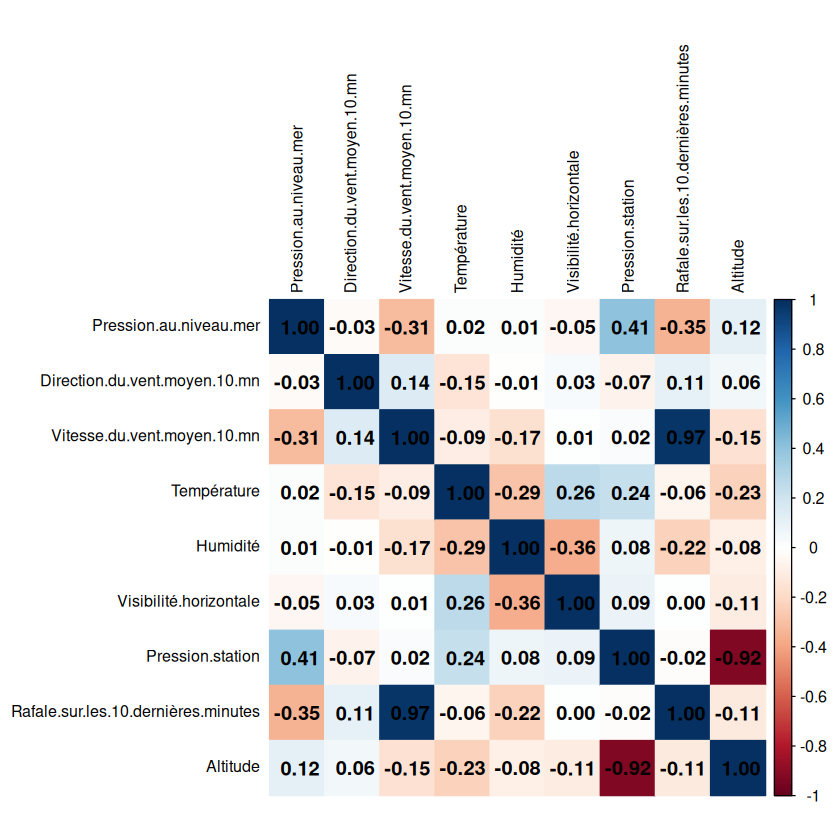

In [ ]:
library(corrplot)

cols_basics <- c(
  "Pression.au.niveau.mer",
  "Direction.du.vent.moyen.10.mn",
  "Vitesse.du.vent.moyen.10.mn",
  "Température",
  "Humidité",
  "Visibilité.horizontale",
  "Pression.station",
  "Rafale.sur.les.10.dernières.minutes",
  "Altitude",
  "Précipitations.dans.les.3.dernières.heures"
)

df_numeric <- df[, cols_basics]
df_numeric <- as.data.frame(lapply(df_numeric, function(x) as.numeric(as.character(x))))

mat_cor <- cor(df_numeric, use = "pairwise.complete.obs")
mat_cor
par(bg = "white")

# Corrplot amélioré
corrplot(
  mat_cor,
  method = "color",      # couleurs remplies au lieu de cercles
  addCoef.col = "black", # affiche la valeur de corrélation
  tl.col = "black",      # couleur des labels
  tl.cex = 0.8,          # taille du texte
  cl.cex = 0.8           # taille de la légende
)

## Regression Température = f (Année)

## Regression vitesse et direction du vent

Tarbes pour les montagnes

Toulouse pour le vent d'autan

## Regression Multiple :
On met la totalité du dataset à Toulouse pour regarder la prediction de temperature
On fait des kfold pour entrainer et des lasso pour regarder en combien de paramètres on peut prédire la meteo

In [ ]:
colnames(df)

[1] "ID.OMM.station"                                           
 [2] "Date"                                                     
 [3] "Pression.au.niveau.mer"                                   
 [4] "Variation.de.pression.en.3.heures"                        
 [5] "Type.de.tendance.barométrique"                            
 [6] "Direction.du.vent.moyen.10.mn"                            
 [7] "Vitesse.du.vent.moyen.10.mn"                              
 [8] "Température"                                              
 [9] "Point.de.rosée"                                           
[10] "Humidité"                                                 
[11] "Visibilité.horizontale"                                   
[12] "Temps.présent"                                            
[13] "Temps.passé.1"                                            
[14] "Temps.passé.2"                                            
[15] "Nebulosité.totale"                                        
[16] "Nébulosité..des.nuages.de.l..étage.inférieur"             
[17] "Hauteur.de.la.base.des.nuages.de.l.étage.inférieur"       
[18] "Type.des.nuages.de.l.étage.inférieur"                     
[19] "Type.des.nuages.de.l.étage.moyen"                         
[20] "Type.des.nuages.de.l.étage.supérieur"                     
[21] "Pression.station"                                         
[22] "Niveau.barométrique"                                      
[23] "Géopotentiel"                                             
[24] "Variation.de.pression.en.24.heures"                       
[25] "Température.minimale.sur.12.heures"                       
[26] "Température.minimale.sur.24.heures"                       
[27] "Température.maximale.sur.12.heures"                       
[28] "Température.maximale.sur.24.heures"                       
[29] "Température.minimale.du.sol.sur.12.heures"                
[30] "Méthode.de.mesure.Température.du.thermomètre.mouillé"     
[31] "Température.du.thermomètre.mouillé"                       
[32] "Rafale.sur.les.10.dernières.minutes"                      
[33] "Rafales.sur.une.période"                                  
[34] "Periode.de.mesure.de.la.rafale"                           
[35] "Etat.du.sol"                                              
[36] "Hauteur.totale.de.la.couche.de.neige..glace..autre.au.sol"
[37] "Hauteur.de.la.neige.fraîche"                              
[38] "Periode.de.mesure.de.la.neige.fraiche"                    
[39] "Précipitations.dans.la.dernière.heure"                    
[40] "Précipitations.dans.les.3.dernières.heures"               
[41] "Précipitations.dans.les.6.dernières.heures"               
[42] "Précipitations.dans.les.12.dernières.heures"              
[43] "Précipitations.dans.les.24.dernières.heures"              
[44] "Phénomène.spécial.1"                                      
[45] "Phénomène.spécial.2"                                      
[46] "Phénomène.spécial.3"                                      
[47] "Phénomène.spécial.4"                                      
[48] "Nébulosité.couche.nuageuse.1"                             
[49] "Type.nuage.1"                                             
[50] "Hauteur.de.base.1"                                        
[51] "Nébulosité.couche.nuageuse.2"                             
[52] "Type.nuage.2"                                             
[53] "Hauteur.de.base.2"                                        
[54] "Nébulosité.couche.nuageuse.3"                             
[55] "Type.nuage.3"                                             
[56] "Hauteur.de.base.3"                                        
[57] "Nébulosité.couche.nuageuse.4"                             
[58] "Type.nuage.4"                                             
[59] "Hauteur.de.base.4"                                        
[60] "Coordonnees"                                              
[61] "Nom"                                                      
[62] "Type.de.tendance.barométrique.